In [1]:
from closeness_library import closeness_function
from degree_library import degree_function
from edge_clustering_library import edge_clustering_function, create_second_graph, compute_edge_values
from diameter_library import diameter_function
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import networkx as nx
import matplotlib.pyplot as plt
from skopt import BayesSearchCV

In [2]:
weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
G = nx.Graph()
for endpoints, weight in weight.items():
    G.add_edge(endpoints[0], endpoints[1], weight=weight)

In [3]:
print(closeness_function(G))

0.4661883480139551


In [4]:
print(degree_function(G))

0.6388888888888888


In [5]:
print(edge_clustering_function(G))

0.2412451361867704


In [6]:
print(edge_clustering_function(G))

0.4426229508196721


In [7]:
result_file = gpd.read_file(r'C:\\Users\\camperom\\safety-of-bike-networks\\Code\\OSM_extract\\GovermentData\\velo_mobilites_m.geojson')

In [8]:
names = list(set(result_file['type']))

In [9]:
df = pd.read_csv('tags_metrovelo.csv', header=None, index_col=0, sep=';').squeeze('columns')
mapping = df.to_dict()

In [10]:
with open("./velo_mobilites_m.geojson", "r") as f:
    res = json.load(f)

In [11]:
features = {}

for feature in tqdm(res["features"]):
    try:
        tag = feature["properties"]["type"]
        if tag not in features.keys():
            features[tag] = []
        features[tag].append(feature)
    except:
        pass

  0%|          | 0/1295 [00:00<?, ?it/s]

In [12]:
result_file = 'C:\\Users\\camperom\\Documents\\Phd_Inria\\DataBaseFrance\\Administrative_limites_villes\\a_epci2021.json'

# Read the file with the administrative coordinates
with open(result_file, 'r', encoding='UTF-8') as f:
    gj = geojson.load(f)

# Find the index list of coordinates of the specific city
for i in range(len(list(gj["features"]))):
    if gj["features"][i]["properties"]["libgeo"] == "Grenoble-Alpes-Métropole":
        ind = i
        codgeo = gj["features"][i]["properties"]["codgeo"]
        break

#Create a Polygon shape 
coords = gj["features"][ind]["geometry"]["coordinates"]
poly = geoPolygon(coords[0])

In [13]:
features 

{'chronovelo': [{'type': 'Feature',
   'properties': {'ogc_fid': 1489,
    'anne_maj': 2016,
    'type': 'chronovelo',
    'LaMetro': True},
   'geometry': {'type': 'LineString',
    'coordinates': [[5.74223, 45.17402],
     [5.74132, 45.1738],
     [5.74064, 45.17361],
     [5.7402, 45.17351]]}},
  {'type': 'Feature',
   'properties': {'ogc_fid': 1490,
    'anne_maj': 2016,
    'type': 'chronovelo',
    'LaMetro': True},
   'geometry': {'type': 'LineString',
    'coordinates': [[5.73701, 45.17272],
     [5.7361, 45.17272],
     [5.73488, 45.17273]]}},
  {'type': 'Feature',
   'properties': {'ogc_fid': 1491,
    'anne_maj': 2016,
    'type': 'chronovelo',
    'LaMetro': True},
   'geometry': {'type': 'LineString',
    'coordinates': [[5.73488, 45.17273],
     [5.73483, 45.17273],
     [5.73481, 45.17295],
     [5.73482, 45.1731],
     [5.73476, 45.17315]]}},
  {'type': 'Feature',
   'properties': {'ogc_fid': 1492,
    'anne_maj': 2016,
    'type': 'chronovelo',
    'LaMetro': True},
  

In [14]:
# def clean(feature):
#     feature["properties"] = {p:v for p,v in feature["properties"].items() if v is not None}
#     if 'way' in feature['properties'].keys():
#         del feature['properties']['way']
#     return feature

# # max_lat = 45.229575
# # min_lat = 45.132071
# # max_lon = 5.798811
# # min_lon = 5.664487
# # bbox = [(min_lon, 45.132071),(5.798811, 45.229575)]
# name_dict = dict([
#     ('veloconseille', '3'), 
#     ('chronovelo','1'), 
#     ('veloseparatif','2'), 
#     ('velodifficile',"4")
# ])
# filt_features = {}
# for key, feature_list in tqdm(features.items()):

#     filt_features[name_dict[key]] = []
#     for feature in feature_list:
#         coord = feature['geometry']['coordinates']
#         for c in coord:
#             if type(c[0]) == float:
#                 lon = c[0]
#                 lat = c[1]
#                 pt = geoPoint(lon, lat)
#                 if (poly.intersects(pt) == True) or (poly.contains(pt) == True):
#                 # if lon <= max_lon and lon >= min_lon and lat >= min_lat and lat <= max_lat:
#                     filt_features[name_dict[key]].append(clean(feature))
#                     break
#             else:
#                 for cc in c:
#                     lon = cc[0]
#                     lat = cc[1]
#                     pt = geoPoint(lon, lat)
#                     if (poly.intersects(pt) == True) or (poly.contains(pt) == True):
#                     # if lon <= max_lon and lon >= min_lon and lat >= min_lat and lat <= max_lat:
#                         filt_features[name_dict[key]].append(clean(feature))
#                         break

In [13]:
def clean(feature):
    feature["properties"] = {p:v for p,v in feature["properties"].items() if v is not None}
    if 'way' in feature['properties'].keys():
        del feature['properties']['way']
    return feature

# max_lat = 45.229575
# min_lat = 45.132071
# max_lon = 5.798811
# min_lon = 5.664487
# bbox = [(min_lon, 45.132071),(5.798811, 45.229575)]
name_dict = dict([
    ('veloconseille', '3'), 
    ('chronovelo','1'), 
    ('veloseparatif','2'), 
    ('velodifficile',"4")
])
filt_features = {}
for key, feature_list in tqdm(features.items()):

    filt_features[name_dict[key]] = []
    for feature in feature_list:
        coord = feature['geometry']['coordinates']
        # filt_features[name_dict[key]].append(clean(feature))
        for c in coord:
            if type(c[0]) == float:
                lon = c[0]
                lat = c[1]
                pt = geoPoint(lon, lat)
                # if (poly.intersects(pt) == True) or (poly.contains(pt) == True):
                # if lon <= max_lon and lon >= min_lon and lat >= min_lat and lat <= max_lat:
                filt_features[name_dict[key]].append(clean(feature))
                break
            else:
                for cc in c:
                    lon = cc[0]
                    lat = cc[1]
                    pt = geoPoint(lon, lat)
                    # if (poly.intersects(pt) == True) or (poly.contains(pt) == True):
                    # if lon <= max_lon and lon >= min_lon and lat >= min_lat and lat <= max_lat:
                    filt_features[name_dict[key]].append(clean(feature))
                    break

  0%|          | 0/4 [00:00<?, ?it/s]

In [14]:
print(features)
print(filt_features)

{'chronovelo': [{'type': 'Feature', 'properties': {'ogc_fid': 1489, 'anne_maj': 2016, 'type': 'chronovelo', 'LaMetro': True}, 'geometry': {'type': 'LineString', 'coordinates': [[5.74223, 45.17402], [5.74132, 45.1738], [5.74064, 45.17361], [5.7402, 45.17351]]}}, {'type': 'Feature', 'properties': {'ogc_fid': 1490, 'anne_maj': 2016, 'type': 'chronovelo', 'LaMetro': True}, 'geometry': {'type': 'LineString', 'coordinates': [[5.73701, 45.17272], [5.7361, 45.17272], [5.73488, 45.17273]]}}, {'type': 'Feature', 'properties': {'ogc_fid': 1491, 'anne_maj': 2016, 'type': 'chronovelo', 'LaMetro': True}, 'geometry': {'type': 'LineString', 'coordinates': [[5.73488, 45.17273], [5.73483, 45.17273], [5.73481, 45.17295], [5.73482, 45.1731], [5.73476, 45.17315]]}}, {'type': 'Feature', 'properties': {'ogc_fid': 1492, 'anne_maj': 2016, 'type': 'chronovelo', 'LaMetro': True}, 'geometry': {'type': 'LineString', 'coordinates': [[5.73476, 45.17315], [5.73452, 45.17322], [5.73434, 45.17323], [5.73422, 45.17321],

In [18]:
# Your dictionary structure
data = filt_features

# Create an empty graph
G = nx.Graph()

# Function to calculate geographic distance between two points

# Iterate through each key (e.g., '1', '2', '3', '4', etc.) in the dictionary
final_points = []
for key, features in data.items():
    for feature in features:
        geometry = feature['geometry']
        coordinates = geometry['coordinates']
        print(coordinates)
        if type(coordinates[0][0]) == float:
            for i in range(len(coordinates) - 1):
                endpoint1 = coordinates[i]
                endpoint2 = coordinates[i + 1]
                # print(endpoint1, endpoint2)
                line = Feature(geometry=LineString([endpoint1, endpoint2]))
                weight = int(key) #* calculate_distance(line, Unit.meters)
                print(weight, endpoint1, endpoint2)
                G.add_edge(tuple(endpoint1), tuple(endpoint2), weight=weight, key=int(key))
            final_points.append(tuple(coordinates[0]))
        else: 
            for sub_list in coordinates:
                for i in range(len(sub_list) - 1):
                    endpoint1 = sub_list[i]
                    endpoint2 = sub_list[i + 1]
                    # print(endpoint1, endpoint2)
                    line = Feature(geometry=LineString([endpoint1, endpoint2]))
                    weight = int(key)# * calculate_distance(line, Unit.meters)
                    print(weight, endpoint1, endpoint2)
                    G.add_edge(tuple(endpoint1), tuple(endpoint2), weight=weight, key=int(key))
                final_points.append(tuple(sub_list[0]))
        # weight = int(key) * calculate_distance(line, Unit.meters)
        # Convert the coordinates to a list of tuples
        # coordinates = [tuple(coord) for coord in coordinates]
        # print(coordinates)
        # Create a LineString from the coordinates
        # line = geoLineString(coordinates)

        # Calculate the weight as the key multiplied by the geographic distance
        

        # Add the edge to the graph with the weight
        


# Example: Getting the weight of an edge
# edge_weight = G.get_edge_data((5.74223, 45.17402), (5.7402, 45.17351))['weight']
# print(f"Edge weight: {edge_weight}")

[[5.74223, 45.17402], [5.74132, 45.1738], [5.74064, 45.17361], [5.7402, 45.17351]]
1 [5.74223, 45.17402] [5.74132, 45.1738]
1 [5.74132, 45.1738] [5.74064, 45.17361]
1 [5.74064, 45.17361] [5.7402, 45.17351]
[[5.73701, 45.17272], [5.7361, 45.17272], [5.73488, 45.17273]]
1 [5.73701, 45.17272] [5.7361, 45.17272]
1 [5.7361, 45.17272] [5.73488, 45.17273]
[[5.73488, 45.17273], [5.73483, 45.17273], [5.73481, 45.17295], [5.73482, 45.1731], [5.73476, 45.17315]]
1 [5.73488, 45.17273] [5.73483, 45.17273]
1 [5.73483, 45.17273] [5.73481, 45.17295]
1 [5.73481, 45.17295] [5.73482, 45.1731]
1 [5.73482, 45.1731] [5.73476, 45.17315]
[[5.73476, 45.17315], [5.73452, 45.17322], [5.73434, 45.17323], [5.73422, 45.17321], [5.73396, 45.17314], [5.73382, 45.17314]]
1 [5.73476, 45.17315] [5.73452, 45.17322]
1 [5.73452, 45.17322] [5.73434, 45.17323]
1 [5.73434, 45.17323] [5.73422, 45.17321]
1 [5.73422, 45.17321] [5.73396, 45.17314]
1 [5.73396, 45.17314] [5.73382, 45.17314]
[[5.75957, 45.20183], [5.76048, 45.20253]

In [19]:
# junction_test = True
# while junction_test:
#     junction_test = False
for node in list(G.nodes()):
    if node not in final_points:
        neighbors = list(G.neighbors(node))
        if len(neighbors) == 2:
            endpoint1 = neighbors[0]
            endpoint2 = neighbors[1]
            data1 = G.get_edge_data(node, endpoint1)
            data2 = G.get_edge_data(node, endpoint2)
            if data1['key'] == data2['key']:
                new_weight = data1['weight'] #+ data2['weight']
                new_key = data1['key']
                G.add_edge(endpoint1, endpoint2, weight=new_weight, key=new_key)
                G.remove_node(node)
                # junction_test = True

In [20]:
# Remove self-loops
def remove_self_loops(G):
    edges_to_remove = []
    for edge in G.edges():
        if edge[0] == edge[1]:
            edges_to_remove.append(edge)
    G.remove_edges_from(edges_to_remove)

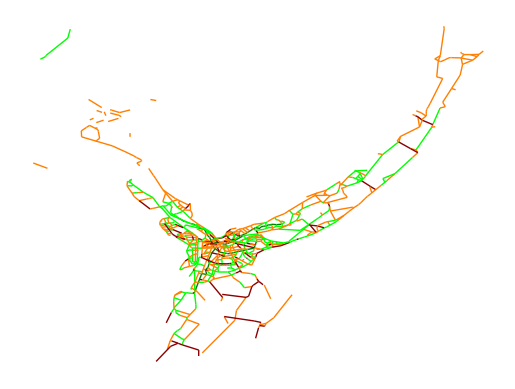

In [22]:
# Remove self-loops
# def remove_self_loops(G):
#     edges_to_remove = []
#     for edge in G.edges():
#         if edge[0] == edge[1]:
#             edges_to_remove.append(edge)
#     G.remove_edges_from(edges_to_remove)

remove_self_loops(G)

# Define colors for each key
colors = {4: '#8B0000', 3: '#FF8000', 2: '#00FF00', 1: '#008000'}

# Get the positions of the nodes (using the node coordinates as positions)
pos = {node: node for node in G.nodes()}

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=0)

# Iterate through the edges and draw them with the appropriate color
for edge in G.edges(data=True):
    endpoint1, endpoint2, data = edge
    key = data['key']
    color = colors[key]
    nx.draw_networkx_edges(G, pos, edgelist=[(endpoint1, endpoint2)], edge_color=color, width=1)

# Show the plot
plt.axis('off')
plt.show()

In [39]:
for i in range(4):
    print(len([(u, v) for u, v, data in G.edges(data=True) if data['weight'] == i+1]), i+1)

82 1
654 2
958 3
254 4


In [21]:
# def compute_functions(G):
#     # Compute the values of the four functions for the original graph G
#     closeness_G = closeness_function(G)
#     degree_G = degree_function(G)
#     clustering_G = edge_clustering_function(G)
#     diameter_G = diameter_function(G)
#     values = []
#     values.append((closeness_G, degree_G, clustering_G, diameter_G))
#     # Create a list to store the values of the four functions for each weight change
    

#     # Change the weights from 1 to 2
#     G_2 = nx.Graph()
#     for u, v, data in G.edges(data=True):
#         if data['weight'] == 1:
#             G_2.add_edge(u, v, weight=2)
#         else:
#             G_2.add_edge(u, v, weight=data['weight'])
#     closeness_G_2 = closeness_function(G_2)
#     degree_G_2 = degree_function(G_2)
#     clustering_G_2 = edge_clustering_function(G_2)
#     diameter_G_2 = diameter_function(G_2)
#     values.append((closeness_G_2, degree_G_2, clustering_G_2, diameter_G_2))

#     # Change the weights from 2 to 3
#     G_3 = nx.Graph()
#     for u, v, data in G.edges(data=True):
#         if data['weight'] == 2:
#             G_3.add_edge(u, v, weight=3)
#         else:
#             G_3.add_edge(u, v, weight=data['weight'])
#     closeness_G_3 = closeness_function(G_3)
#     degree_G_3 = degree_function(G_3)
#     clustering_G_3 = edge_clustering_function(G_3)
#     diameter_G_3 = diameter_function(G_3)
#     values.append((closeness_G_3, degree_G_3, clustering_G_3, diameter_G_3))

#     # Change the weights from 3 to 4
#     G_4 = nx.Graph()
#     for u, v, data in G.edges(data=True):
#         if data['weight'] == 3:
#             G_4.add_edge(u, v, weight=4)
#         else:
#             G_4.add_edge(u, v, weight=data['weight'])
#     closeness_G_4 = closeness_function(G_4)
#     degree_G_4 = degree_function(G_4)
#     clustering_G_4 = edge_clustering_function(G_4)
#     diameter_G_4 = diameter_function(G_4)
#     values.append((closeness_G_4, degree_G_4, clustering_G_4, diameter_G_4))

#     # Compute the values of the four functions for the original graph G with the weights changed from 1 to 2, 2 to 3, and 3 to 4
    

#     return values
# vector_functions = compute_functions(G)

In [23]:
def compute_norms(values):
    # Convert the list of vectors to a numpy array
    values_array = np.array(values)

    # Compute the difference between each vector and the first vector
    diff = values_array - values_array[0]

    # Compute the norm of each row in the difference array
    norms = np.linalg.norm(diff, axis=1)

    return norms

# print(compute_norms(vector_functions))

In [22]:
# print(vector_functions)

In [24]:
def compute_metrics(G):
    # Compute the values of the four functions for the original graph G
    # closeness_G = closeness_function(G)
    # degree_G = degree_function(G)
    # clustering_G = edge_clustering_function(G)
    # diameter_G = diameter_function(G)

    # Get the edges with weight 2
    edges_2 = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 2]

    # Compute the betweenness centrality of the edges with weight 2 -DESCENDEND ORDER
    # betweenness = nx.edge_betweenness_centrality(G, weight='weight')
    betweenness = nx.edge_betweenness_centrality(G, k=None, normalized=True, weight='weight', seed=None)
    betweenness_2 = {e: betweenness[e] for e in edges_2}

    # Sort the edges with weight 2 by their betweenness centrality
    sorted_edges_2 = [e for e, _ in sorted(betweenness_2.items(), key=lambda x: x[1], reverse=True)]

    # Compute the number of edges to change to weight 3 in each iteration
    num_edges_3 = int(len(edges_2) * 0.05)

    # Create a list to store the values of the four functions for each weight change
    values = []
    GA = create_second_graph(G)
    ed_GA = compute_edge_values(GA)
    # Change the weights of the first 5% of edges with weight 2 to weight 3, compute the metrics, and save the values
    # for i in range(0, len(edges_2), num_edges_3):
    for i in range(0, len(edges_2), num_edges_3):
    # for i in range(0, 100, num_edges_3):
        edges_to_change = sorted_edges_2[0:i+num_edges_3]
        G_3 = G.copy()
        for u, v in edges_to_change:
            G_3[u][v]['weight'] = 3
        # closeness_G_3 = closeness_function(G_3)
        # degree_G_3 = degree_function(G_3)
        clustering_G_3 = edge_clustering_function(G_3, ed_GA)
        # diameter_G_3 = diameter_function(G_3)
        # values.append((closeness_G_3, degree_G_3, clustering_G_3, diameter_G_3))
        values.append(clustering_G_3)
        print(i, len(edges_2), num_edges_3)
    # Compute the values of the four functions for the original graph G with all edges of weight 2 changed to weight 3
    # G_3_all = G.copy()
    # for u, v, data in G_3_all.edges(data=True):
    #     if data['weight'] == 2:
    #         G_3_all[u][v]['weight'] = 3
    # closeness_G_3_all = closeness_function(G_3_all)
    # degree_G_3_all = degree_function(G_3_all)
    # clustering_G_3_all = edge_clustering_function(G_3_all)
    # diameter_G_3_all = diameter_function(G_3_all)
    # values.append(closeness_G_3_all)
    # values.append((closeness_G_3_all, degree_G_3_all, clustering_G_3_all, diameter_G_3_all))
    return values
vector_test = compute_metrics(G)

TypeError: edge_clustering_function() takes 1 positional argument but 2 were given

In [ ]:
print(vector_test)

[0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.8826291079812206, 0.9002347417840375, 0.9002347417840375, 0.9002347417840375, 0.9002347417840375, 0.9589201877934272, 1.0, 1.0]


In [ ]:
# print(vec_1)
vec_2 = []
for i in vec_1:
    # print(i)
    # print(i[3])
    vec_2.append(i[3])
print(vec_2)

[0.21833227243793762, 0.22851686823679185, 0.22978994271164863, 0.4958625079567155, 0.5429662635264163, 0.6912794398472311, 0.7052832590706556, 0.7313812858052197, 0.7498408656906429, 0.7791215786123489, 0.8090388287714831, 0.8389560789306174, 0.8567791215786124, 0.8746021642266073, 0.893698281349459, 0.9140674729471674, 0.9325270528325907, 0.950986632718014, 0.9669000636537237, 0.9675366008911521, 0.9675366008911521]


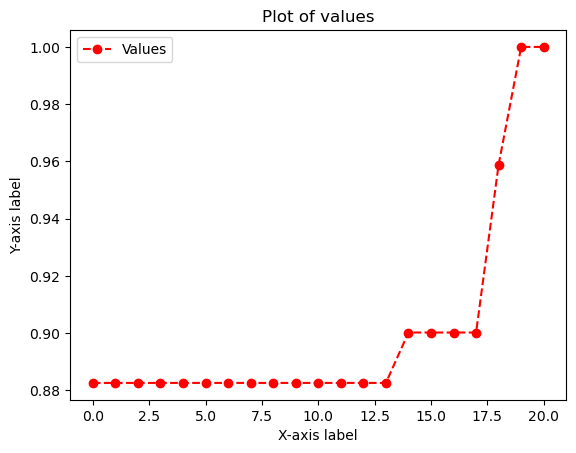

In [ ]:

# Plot the values with a red dashed line and a circle marker
plt.plot(vector_test, 'r--o')

# Add labels to the axes and a title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Plot of values')

# Add a legend
plt.legend(['Values'])

# Show the plot
plt.show()

In [ ]:
import pickle
with open('Vector_file.pkl', 'wb') as f:
    pickle.dump(vector_test, f)

In [ ]:
import pickle
with open('Vector_file.pkl', 'rb') as f:
    vec_1 = pickle.load(f)

In [ ]:
# del vector_functions[4]

In [ ]:
differences = compute_norms(vec_1)*100 

In [ ]:
print(differences)

[ 0.          1.31860609  3.87676708 15.91564603 46.98004294 52.19263578
 52.86043094 55.29348519 57.60958157 60.4258185  63.1854302  66.00305566
 67.63313228 69.71238369 71.92412507 73.71581973 75.1671183  77.01583166
 78.48188039 79.0284891  79.04688108]


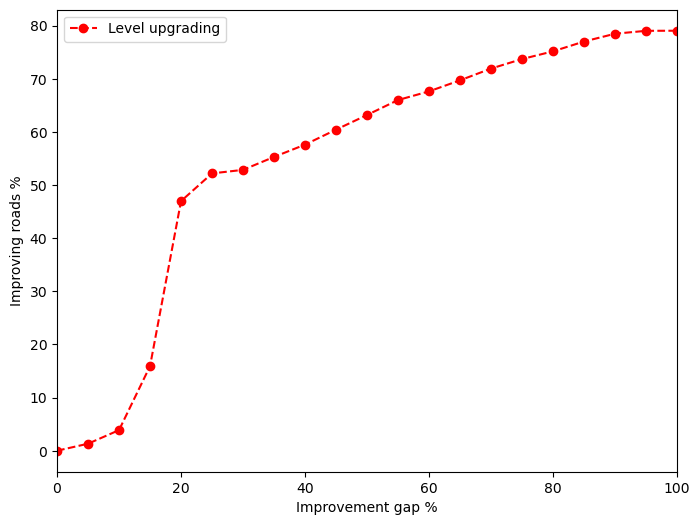

In [ ]:
# Plot the values with a red dashed line and a circle marker
x = np.linspace(0, 100, 21)
plt.subplots(figsize=(8, 6))
plt.plot(x, differences, 'r--o')

# Add labels to the axes and a title
plt.xlabel('Improvement gap %')
plt.ylabel('Improving roads %')
# plt.title('Plot of values')

# Add a legend
plt.legend(['Level upgrading'])
plt.xlim(0, 100)
plt.savefig('./Images/second_scenario_1.png', dpi=800)
# Show the plot
plt.show()

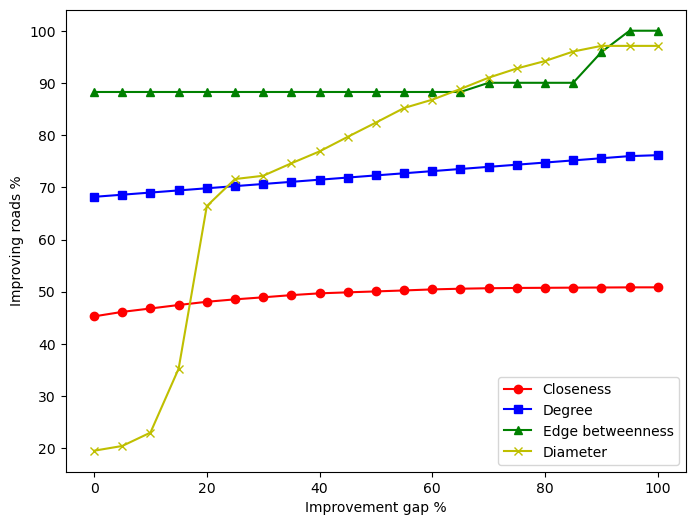

In [ ]:
# print(vec_1)
x = np.linspace(0, 100, 21)
clos_vec = []
degr_vec = []
edge_vec = []
diam_vec = []
for i in vec_1:
    clos_vec.append(i[0]*100)
    degr_vec.append(i[1]*100)
    edge_vec.append(i[2]*100)
    diam_vec.append(i[3]*100)
clos_norm = np.linalg.norm(np.array(clos_vec) - clos_vec[0])
degr_norm = np.linalg.norm(np.array(degr_vec) - degr_vec[0])
edge_norm = np.linalg.norm(np.array(edge_vec) - edge_vec[0])
diam_norm = np.linalg.norm(np.array(diam_vec) - diam_vec[0])
plt.subplots(figsize=(8, 6))
plt.plot(x, clos_vec, 'ro-', label='Closeness')
plt.plot(x, degr_vec, 'bs-', label='Degree')
plt.plot(x, edge_vec, 'g^-', label='Edge betweenness')
plt.plot(x, diam_vec, 'yx-', label='Diameter')
plt.xlabel('Improvement gap %')
plt.ylabel('Improving roads %')
# Add a legend to the plot
plt.legend()
plt.savefig('./Images/second_scenario_2.png', dpi=800)
# Show the plot
plt.show()

In [ ]:
def edges_list(G):
    edges_2 = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 2]
    # Compute the betweenness centrality of the edges with weight 2 -DESCENDEND ORDER
    # betweenness = nx.edge_betweenness_centrality(G, weight='weight')
    betweenness = nx.edge_betweenness_centrality(G, k=None, normalized=True, weight='weight', seed=None)
    betweenness_2 = {e: betweenness[e] for e in edges_2}

    # Sort the edges with weight 2 by their betweenness centrality
    sorted_edges_2 = [e for e, _ in sorted(betweenness_2.items(), key=lambda x: x[1], reverse=True)]

    # Compute the number of edges to change to weight 3 in each iteration
    num_edges_3 = int(len(edges_2) * 0.05)

    # Create a list to store the values of the four functions for each weight change
    edges_list = []
    # Change the weights of the first 5% of edges with weight 2 to weight 3, compute the metrics, and save the values
    # for i in range(0, len(edges_2), num_edges_3):
    for i in range(0, len(edges_2), num_edges_3):
    # for i in range(0, 100, num_edges_3):
        edges_list.append(sorted_edges_2[i:i+num_edges_3])
    return edges_list
set_edges = edges_list(G)
print(set_edges)

[[((5.75251, 45.19603), (5.7539, 45.19696)), ((5.76916, 45.19899), (5.7539, 45.19696)), ((5.77042, 45.19826), (5.77983, 45.19237)), ((5.77042, 45.19826), (5.76916, 45.19899)), ((5.78625, 45.18957), (5.77983, 45.19237)), ((5.78625, 45.18957), (5.78634, 45.18956)), ((5.78634, 45.18956), (5.80063, 45.18707)), ((5.70023, 45.18007), (5.70541, 45.18003)), ((5.70023, 45.18007), (5.69777, 45.18015)), ((5.69777, 45.18015), (5.69403, 45.1803)), ((5.79052, 45.18497), (5.79887, 45.18545)), ((5.78892, 45.18533), (5.78696, 45.18458)), ((5.71811, 45.15001), (5.72289, 45.14851)), ((5.72289, 45.14851), (5.7244, 45.14811)), ((5.73516, 45.14808), (5.7244, 45.14811)), ((5.73516, 45.14808), (5.73991, 45.14925)), ((5.75289, 45.15499), (5.73991, 45.14925)), ((5.7165, 45.15053), (5.71533, 45.15088)), ((5.7165, 45.15053), (5.71811, 45.15001)), ((5.69403, 45.1803), (5.69412, 45.17718)), ((5.74171, 45.20109), (5.74357, 45.19849)), ((5.69412, 45.17718), (5.69431, 45.1709)), ((5.74368, 45.19822), (5.74357, 45.1984

21
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
13


21 21 21 21


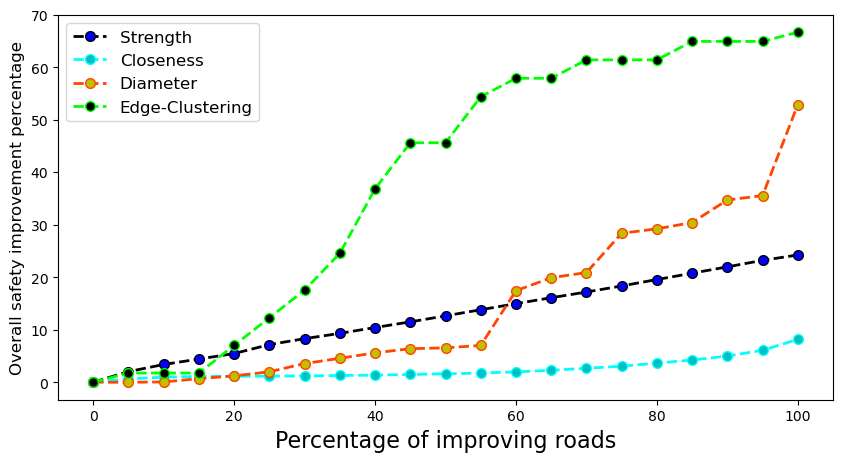

In [29]:
strength = [57.48899051490509, 59.513042005420004, 60.86805555555551, 61.9063346883469, 62.95435298102983, 64.65658875338752, 65.78717818428181, 66.7941226287263, 67.909891598916, 68.98416327913283, 70.13169037940384, 71.29827235772362, 72.45638550135506, 73.58231707317074, 74.6726795392954, 75.82655826558263, 77.04818766937662, 78.2507621951219, 79.46815718157178, 80.69910230352299, 81.72467818428186]
closennes = [41.51450533162684, 42.13318987108123, 42.48578953229026, 42.61209227202198, 42.643257076077745, 42.673771152952924, 42.72264981487195, 42.79749863682726, 42.8631612314369, 42.991496645234896, 43.11484816631971, 43.26178283870101, 43.47970267993209, 43.78880774860035, 44.174585155087364, 44.564600265450046, 45.15096749849634, 45.75094134869607, 46.48917491800907, 47.60510915117394, 49.66736586675631]
diameter = [35.39267015706806, 35.39267015706806, 35.44502617801047, 36.07329842931937, 36.596858638743456, 37.382198952879584, 38.952879581151834, 39.94764397905759, 40.99476439790576, 41.78010471204188, 41.93717277486911, 42.40837696335078, 52.82722513089006, 55.287958115183244, 56.282722513089, 63.769633507853406, 64.60732984293193, 65.81151832460733, 70.10471204188482, 70.94240837696336, 88.27225130890054]
edge_clustering = [5.2631578947368425, 7.017543859649122, 7.017543859649122, 7.017543859649122, 12.280701754385966, 17.54385964912281, 22.80701754385965, 29.82456140350877, 42.10526315789474, 50.87719298245614, 50.87719298245614, 59.64912280701754, 63.1578947368421, 63.1578947368421, 66.66666666666667, 66.66666666666667, 66.66666666666667, 70.17543859649123, 70.17543859649123, 70.17543859649123, 71.9298245614035]
print(len(strength), len(closennes), len(diameter), len(edge_clustering))   
M1 = np.array([strength, closennes, diameter, edge_clustering])
 #--------------------------------------------------------------------------------------------------------------------------------------------------------------------
strength_r = [57.83565334530759, 58.441850022451725, 59.03682083520431, 59.63179164795689, 60.22676246070947, 60.82173327346205, 61.41670408621464, 62.011674898967215, 62.6066457117198, 63.201616524472385, 63.79658733722496, 64.39155814997754, 64.98652896273013, 65.58149977548271, 66.17647058823529, 66.77144140098787, 67.36641221374046, 67.96138302649304, 68.55635383924562, 69.15132465199821, 69.7687471935339]
closennes_r = [42.29620231704639, 42.31418659525602, 42.3372859089906, 42.36477246085869, 42.40261992241903, 42.43743738936258, 42.493641593270546, 42.58086256039474, 42.65171442505411, 42.79479569944486, 42.92990621572508, 43.08627712818374, 43.32314592942066, 43.663197387814456, 44.08445589923557, 44.50456308362797, 45.12060332901744, 45.745830871733645, 46.51417251953607, 47.66860832618698, 49.88873983133641]
diameter_r = [31.36125654450262, 34.083769633507856, 34.13612565445026, 34.76439790575917, 35.39267015706806, 36.12565445026178, 37.59162303664921, 38.795811518324605, 40.20942408376963, 40.83769633507853, 41.30890052356021, 41.832460732984295, 52.19895287958115, 54.86910994764398, 55.96858638743456, 62.09424083769633, 63.03664921465969, 64.45026178010471, 67.90575916230367, 69.84293193717276, 87.43455497382199]
edge_clustering_r = [4.332755632582322, 6.065857885615249, 6.065857885615249, 6.065857885615249, 7.365684575389945, 17.76429809358752, 22.53032928942807, 28.596187175043315, 40.7279029462738, 48.26689774696706, 48.26689774696706, 58.23223570190641, 61.69844020797227, 61.69844020797227, 64.7313691507799, 64.7313691507799, 64.7313691507799, 69.06412478336222, 69.06412478336222, 69.06412478336222, 70.79722703639516]

M2 = np.array([strength_r, closennes_r, diameter_r, edge_clustering_r])
M2 = np.array([strength_r,  closennes_r, diameter_r, edge_clustering_r])
#--------------------------------------------------------------------------------------------------------------------------------------------------------------------
# --------------------------------------------------------------------------------------------------------------------------------------------------------------------
b_names = ['5%','10%','15%','20%','25%','30%','35%','40%','45%','50%','55%','60%','65%','70%','75%','80%','85%','90%','100%']
diff_1 = []
diff_2 = []
diff_3 = []
diff_4 = []
x1 = []
for i in range(M1.shape[1]):
    diff_1.append(np.linalg.norm(strength[i]-strength[0]))
    diff_2.append(np.linalg.norm(closennes[i] - closennes[0]))
    diff_3.append(np.linalg.norm(diameter[i] - diameter[0]))
    diff_4.append(np.linalg.norm(edge_clustering[i] - edge_clustering[0]))
    x1.append(5*(i))
#print(diff_1)
#print(diff_2)
fig = plt.figure(figsize=(10, 5))
#markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
#colors = ['r','g','b','c','m', 'y', 'k']
markers = ["," , "o" , "^" , "<"]
colors = ['#000000','#00FFFF', '#FF4500','#00FF00']
colors_edge = ['b','c', 'y', 'k']
labels = ['Strength ','Closeness','Diameter','Edge-Clustering']
differences = [diff_1, diff_2, diff_3, diff_4]
for i in range(4):
    plt.plot(x1, differences[i],
                color=colors[i],
                markeredgecolor=colors[i],
                lw=2,
                ls='--',
                markerfacecolor=colors_edge[i],
                marker='o',
                #edgecolor=colors_edge[i],
                label=labels[i],
                markersize=7)



plt.legend(loc='upper left', fontsize="12")
#plt.legend(loc='upper right', fontsize="12")
plt.ylabel("Overall safety improvement percentage", fontsize="12")
plt.xlabel("Percentage of improving roads", fontsize="16")
#plt.title("Impact of soft transport network two level improvements")
plt.savefig('./Images/second_scenario_2.png', dpi=800)
# plt.savefig('L1_Second_scenery_graphic_metrics.eps', format='eps')
plt.show()

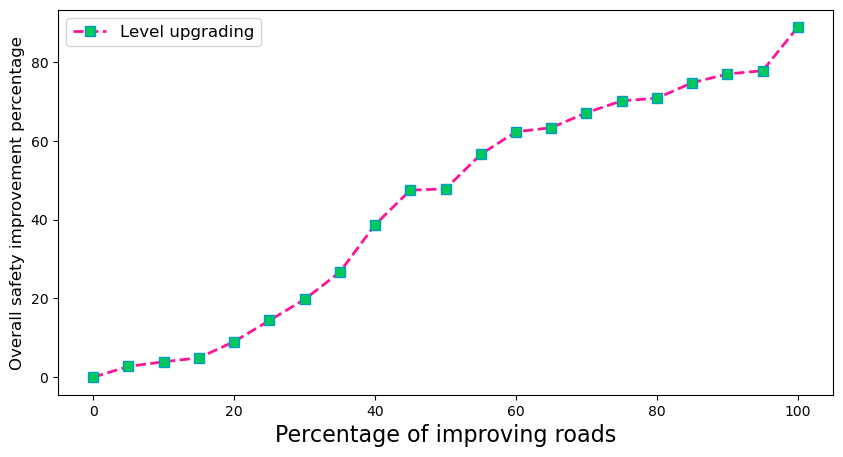

In [30]:
strength = [57.48899051490509, 59.513042005420004, 60.86805555555551, 61.9063346883469, 62.95435298102983, 64.65658875338752, 65.78717818428181, 66.7941226287263, 67.909891598916, 68.98416327913283, 70.13169037940384, 71.29827235772362, 72.45638550135506, 73.58231707317074, 74.6726795392954, 75.82655826558263, 77.04818766937662, 78.2507621951219, 79.46815718157178, 80.69910230352299, 81.72467818428186]
closennes = [41.51450533162684, 42.13318987108123, 42.48578953229026, 42.61209227202198, 42.643257076077745, 42.673771152952924, 42.72264981487195, 42.79749863682726, 42.8631612314369, 42.991496645234896, 43.11484816631971, 43.26178283870101, 43.47970267993209, 43.78880774860035, 44.174585155087364, 44.564600265450046, 45.15096749849634, 45.75094134869607, 46.48917491800907, 47.60510915117394, 49.66736586675631]
diameter = [35.39267015706806, 35.39267015706806, 35.44502617801047, 36.07329842931937, 36.596858638743456, 37.382198952879584, 38.952879581151834, 39.94764397905759, 40.99476439790576, 41.78010471204188, 41.93717277486911, 42.40837696335078, 52.82722513089006, 55.287958115183244, 56.282722513089, 63.769633507853406, 64.60732984293193, 65.81151832460733, 70.10471204188482, 70.94240837696336, 88.27225130890054]
edge_clustering = [5.2631578947368425, 7.017543859649122, 7.017543859649122, 7.017543859649122, 12.280701754385966, 17.54385964912281, 22.80701754385965, 29.82456140350877, 42.10526315789474, 50.87719298245614, 50.87719298245614, 59.64912280701754, 63.1578947368421, 63.1578947368421, 66.66666666666667, 66.66666666666667, 66.66666666666667, 70.17543859649123, 70.17543859649123, 70.17543859649123, 71.9298245614035]
vec_aux = []
for i in range(len(strength)):
    vec_aux.append([strength[i], closennes[i], diameter[i], edge_clustering[i]])
vec_aux = compute_norms(vec_aux)
vec_aux = [i-vec_aux[0] for i in vec_aux]
plt.figure(figsize=(10, 5))
plt.plot(x1, vec_aux, color=	'#FF1493', markeredgecolor="#009ACD", lw=2, ls='--', markerfacecolor="#00C957", marker='s', label="Level upgrading", markersize=7)



plt.legend(loc='upper left', fontsize="12")
#plt.legend(loc='upper right', fontsize="12")
plt.ylabel("Overall safety improvement percentage", fontsize="12")
plt.xlabel("Percentage of improving roads", fontsize="16")
#plt.title("Impact of soft transport network two level improvements")
plt.savefig('./Images/second_scenario_1.png', dpi=800)
# plt.savefig('L1_Second_scenery_graphic_metrics.eps', format='eps')
plt.show()

In [1]:
strength = [57.48899051490509,
60.7497035907859,
69.60683434959354,
65.98217310298101]
closeness = [41.51450533162684,
42.97032036943504,
49.6673658667563,
50.85303463904487]
diameter = [30.00554631170272, 30.00554631170272, 86.18968386023295, 30.00554631170272]
edge_clustering = [5.2631578947368425,
5.2631578947368425,
71.9298245614035,
5.2631578947368425]
vec_aux = []
for i in range(len(strength)):
    vec_aux.append([strength[i], closennes[i], diameter[i], edge_clustering[i]])
vec_aux = compute_norms(vec_aux)
print(vec_aux)

NameError: name 'closennes' is not defined